In [ ]:
import cv2
import keras
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

Using TensorFlow backend.


In [ ]:
x = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/numta_ax.npy')/255.0
y = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/numta_ay.npy')

In [ ]:
x = x.reshape(-1,28,28,1)
y = to_categorical(y)

In [ ]:
x.shape

(19702, 28, 28, 1)

In [ ]:
y.shape

(19702, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 11, 11, 500)       32500     
_________________________________________________________________
dense_2 (Dense)              (None, 11, 11, 250)       125250    
_________________________________________________________________
flatten_1 (Flatten)          (None, 30250)            

In [ ]:
history = model.fit(x, y, validation_split=0.2, epochs=20, batch_size=150)

Train on 15761 samples, validate on 3941 samples
Epoch 1/20
15761/15761 [==============================] - 8s 523us/step - loss: 2.1492 - accuracy: 0.1932 - val_loss: 1.9238 - val_accuracy: 0.3250
Epoch 2/20
15761/15761 [==============================] - 2s 115us/step - loss: 1.4321 - accuracy: 0.5064 - val_loss: 1.1679 - val_accuracy: 0.5993
Epoch 3/20
15761/15761 [==============================] - 2s 115us/step - loss: 0.9904 - accuracy: 0.6602 - val_loss: 0.8649 - val_accuracy: 0.6892
Epoch 4/20
15761/15761 [==============================] - 2s 116us/step - loss: 0.7141 - accuracy: 0.7588 - val_loss: 0.6340 - val_accuracy: 0.7831
Epoch 5/20
15761/15761 [==============================] - 2s 112us/step - loss: 0.4813 - accuracy: 0.8354 - val_loss: 0.4759 - val_accuracy: 0.8412
Epoch 6/20
15761/15761 [==============================] - 2s 115us/step - loss: 0.4003 - accuracy: 0.8638 - val_loss: 0.4013 - val_accuracy: 0.8640
Epoch 7/20
15761/15761 [==============================] - 2s 11

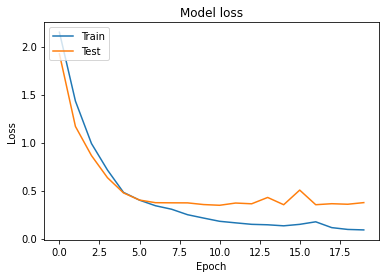

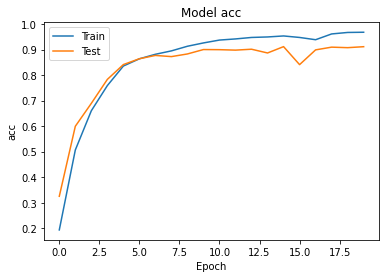

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('val_accuracy_91.h5')

In [ ]:
all_img = []
for i in range(0,10):
  img1 = cv2.imread(str(i)+'.jpg',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (28,28)))

In [ ]:
all_img = np.array(all_img)

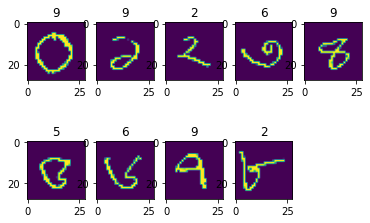

In [ ]:
for i in range(1,10):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,28,28,1)))))